<a href="https://colab.research.google.com/github/ltc870/MLA_LTC/blob/main/MLA2_LTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 2
## Lawrence Caudle
## CS-430-ON
## Machine Learning in the Cloud

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### 1. Imports for specific models

In [9]:
# Include imports for both Linear Regression and Logistic Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 2. Linear Regression - Acquire Data

Read the file into a dataset named "df" from your Google Drive

In [3]:
# reading the file into a dataset named df
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Module1/data/Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [4]:
# rename columns
df = df.rename(columns={
  "Usage_kWh":"usage_kwh",
  "Lagging_Current_Reactive.Power_kVarh":"lag_react_pwr_kvarh",
  "Leading_Current_Reactive_Power_kVarh":"lead_react_pwr_kvarh",
  "Lagging_Current_Power_Factor":"lag_current_pwr",
  "Leading_Current_Power_Factor":"lead_current_pwr",
  "NSM":"nsm",
  "WeekStatus":"week_status",
  "Day_of_week":"day_of_week",
  "Load_Type":"load_type"
  })

df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### 3. Statistics and Visual Exploration

In [10]:
# Summarize the numerical columns of data
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [22]:
# Get the counts of the different load types. Save this into a data frame so you can plot it
load_type_counts_df = df['load_type'].value_counts().reset_index()
load_type_counts_df

,index,load_type
0,Light_Load,18072
1,Medium_Load,9696
2,Maximum_Load,7272


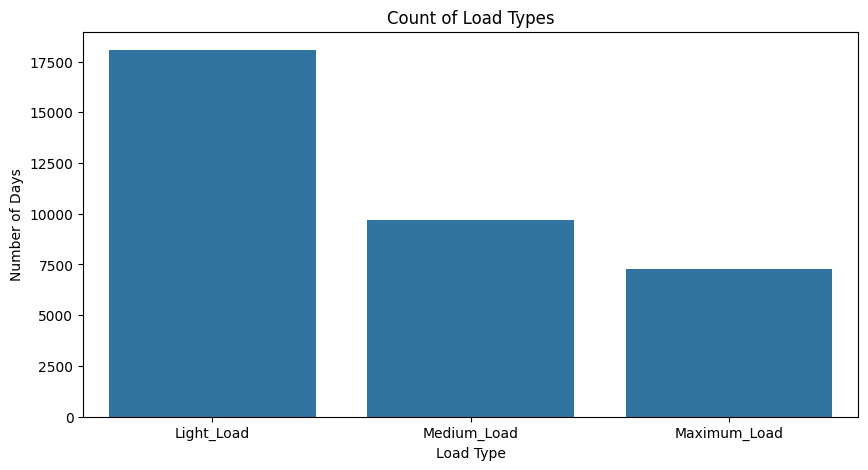

In [27]:
# Create a barplot to view how many days fall under each load type. The size of the plot should 10 x 5.
plt.figure(figsize=(10,5))
sns.barplot(x="index", y="load_type", data=load_type_counts_df)
plt.title('Count of Load Types')
plt.xlabel('Load Type')
plt.ylabel('Number of Days')
plt.show()

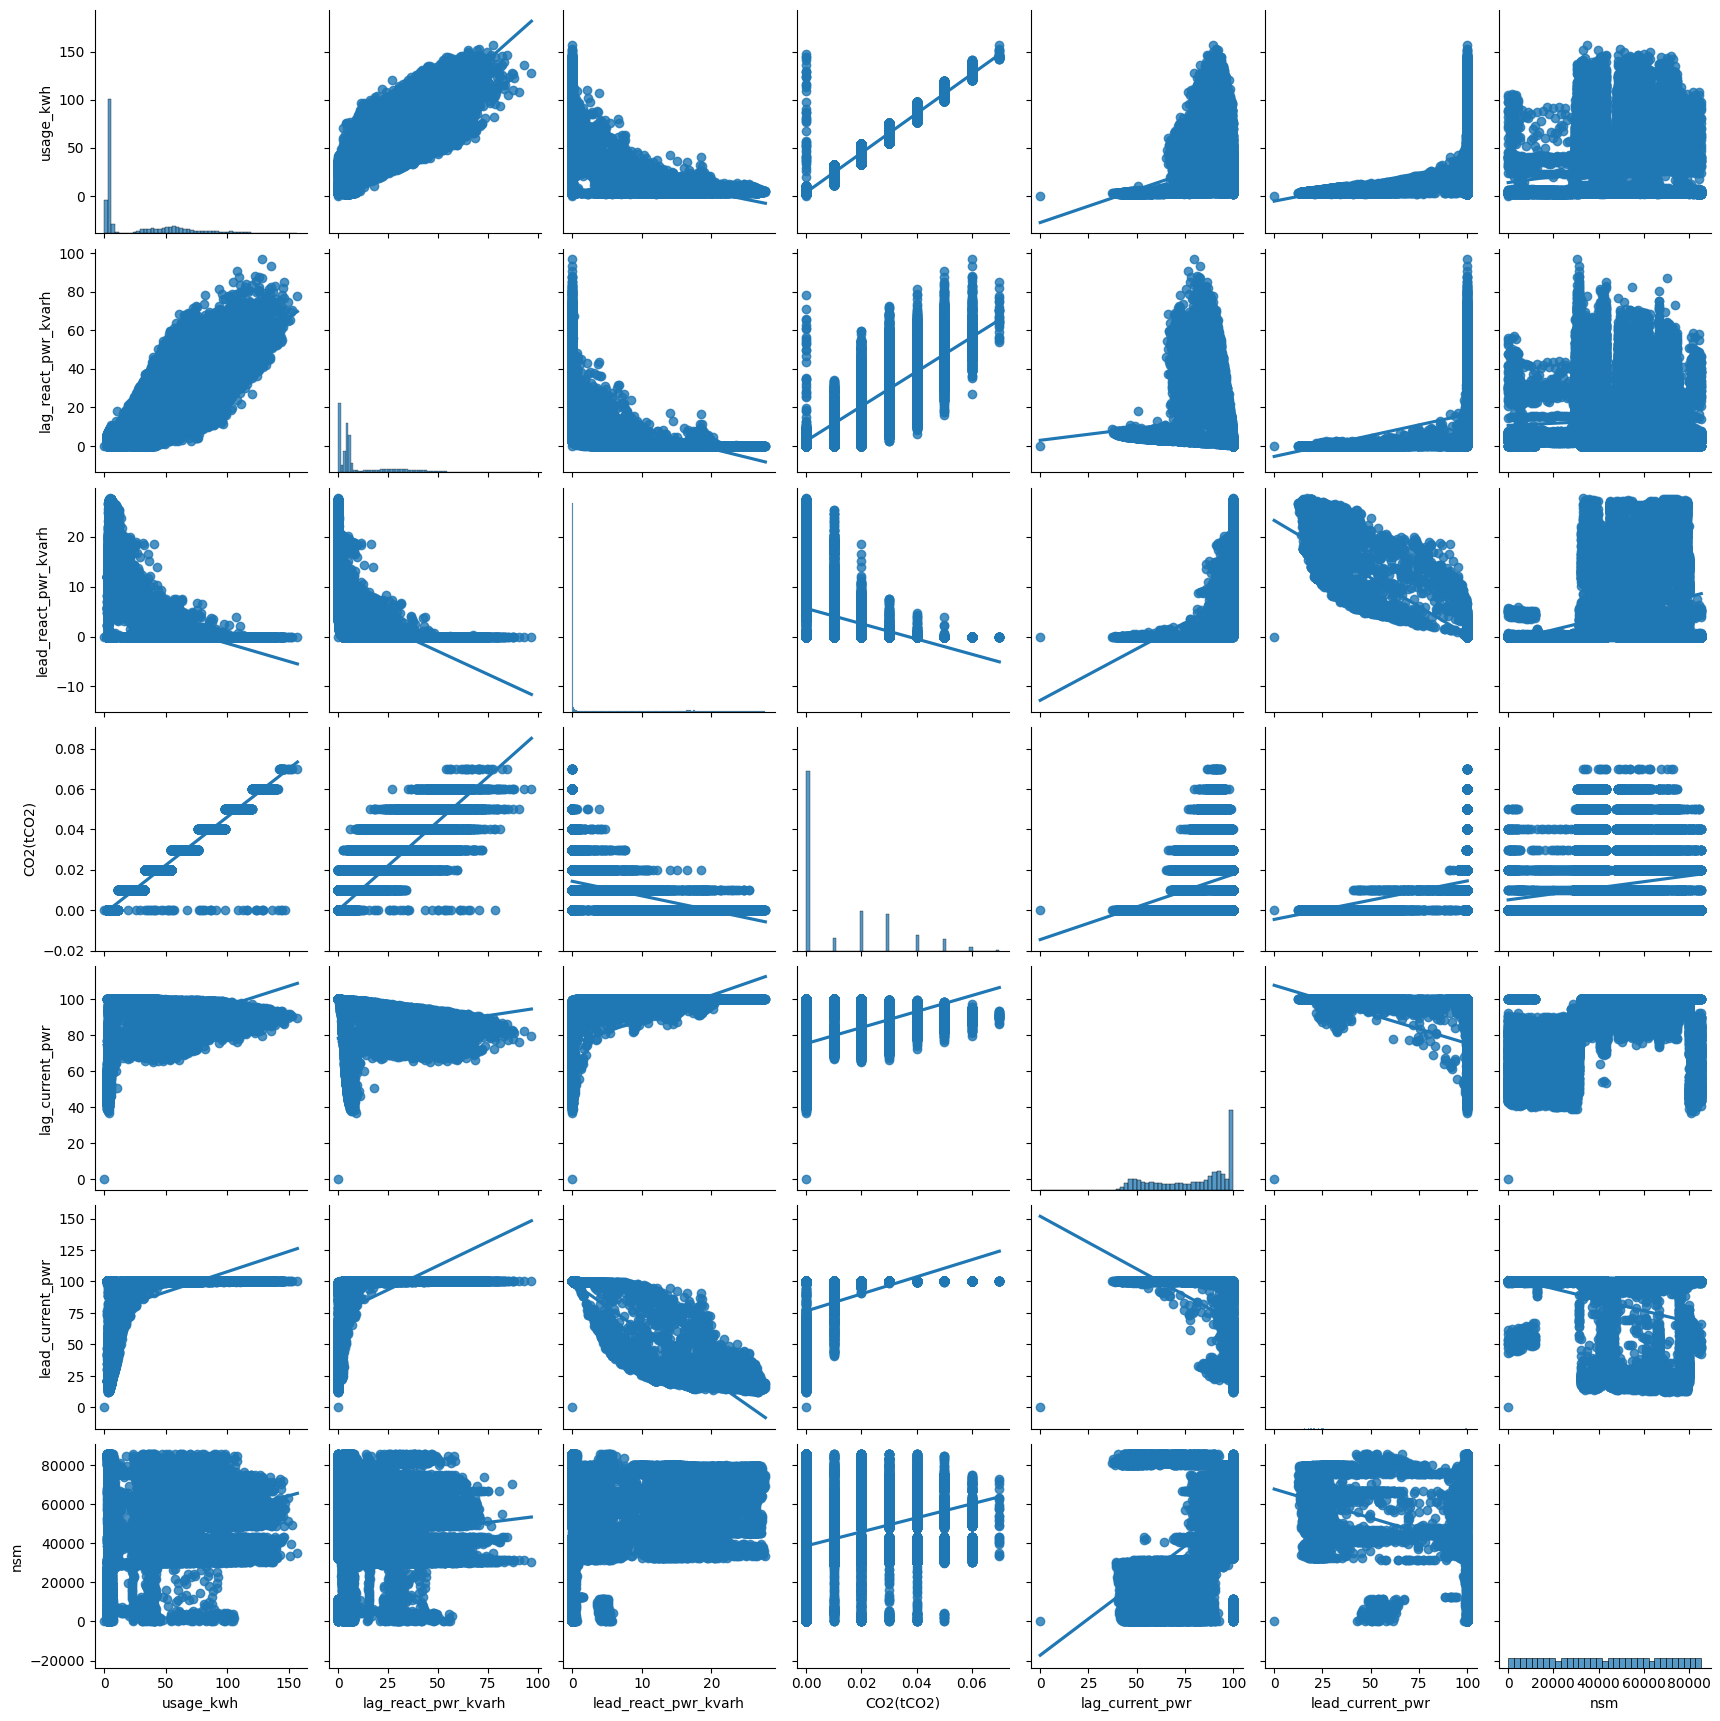

In [28]:
# Create a pairplot of all of the numerical variables using Seaborn.
sns.pairplot(df, kind="reg")

<!-- In a Markdown comment - write up any interesting patterns you see from the pairplot. -->
One relationship that stands out to me is the lead_current_pwr and the lead_react_pwr_kvah. It seems that there's a negative relationship between the two where as if the lead_react_pwer_kvah increases, the lead_curent_pwr decreases.

Another pattern I find interesting is there is a positive relationship between the lag_react_pwr_kvarh and usage_kwh. As the lag_react_pwr_kvarh increases the usage_kwh increases as well.

### 4. Splitting Data into Train/Test

In [57]:
# Create a dataframe called X of your inputs that includes all columns except date and usage_kwh
X = df.drop(['date', 'usage_kwh'], axis=1)
X.head()

,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,2.95,0.0,0.0,73.21,100.0,900,1,Monday,Light_Load
1,4.46,0.0,0.0,66.77,100.0,1800,1,Monday,Light_Load
2,3.28,0.0,0.0,70.28,100.0,2700,1,Monday,Light_Load
3,3.56,0.0,0.0,68.09,100.0,3600,1,Monday,Light_Load
4,4.50,0.0,0.0,64.72,100.0,4500,1,Monday,Light_Load


In [30]:
# Create a dataframe called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.
y = df['usage_kwh']
pd.DataFrame(y).head()

,usage_kwh
0,3.17
1,4.00
2,3.24
3,3.31
4,3.82


In [67]:
# Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 dataframes X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
lr_model = LinearRegression()

### 5. Building the Pipeline

In [69]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMaxScale the numerical variables (not the output).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

num_attribs = list(X.select_dtypes(include=[np.number]))
cat_attribs = list(X.select_dtypes(include=[np.object_]))
num_attribs, cat_attribs

col_transform = ColumnTransformer(transformers=[
  ('num', MinMaxScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attribs)])

In [70]:
# Create a pipeline that will transform the data and then run a Linear Regression.
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
  ('col_transform', col_transform),
  ('lin_reg', lr_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm',
                                                   'week_status']),
                                                 ('cat', OneHotEncoder(),
                                                  ['day_of_week',
                                                   'load_type'])])),
                ('lin_reg', LinearRegression())])

### 6. Executing the Model

In [35]:
# Run the pipeline to fit the Linear Regression Model.

from sklearn import set_config
set_config(display='diagram')
pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('lin_reg', LinearRegression())])

### 7. Evaluating the Model

In [45]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)
y_pred

array([42.046875  ,  4.53710938,  4.98046875, ..., 86.27148438,
        2.96679688,  3.35351562])

In [44]:
# Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.
y_train_pred = pipeline.predict(X_train)
y_test_pred = y_pred

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred) ** (0.5))
print(mean_squared_error(y_test, y_test_pred) ** (0.5))


4.580460289969438
5.049577365044994


The testing set is similar to the training data, so this model is performing ok on unseen data.

In [38]:
# Calculate the R-squared value of the model (test only). In a Markdown comment below the result, interpret the output you receive.
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.9768620665995326


Looking at the r2_score results, it seems that this model is pretty good at capturing the variability in the data. This means the model is a pretty useful model.

In [41]:
# Write the code to display the intercept value(bias) and the coefficients of the model. (These will be two different lines of code)
print(lr_model.intercept_)

14614837268129.598


In [42]:
print(lr_model.coef_)

[ 2.90159117e+01  1.97436131e+00  1.17590034e+02  6.93520100e+00
  4.79817547e+00 -2.74889513e-01 -6.66220626e+12  6.93645173e+12
  2.44864295e+11  2.44864295e+11 -1.33537937e+13 -1.33537937e+13
  2.44864295e+11  2.44864295e+11  2.44864295e+11 -8.19749531e+12
 -8.19749531e+12 -8.19749531e+12]


### 8. Conclusion

<!-- In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage. -->
I believe this model is average at predicting kwh usage.

## Now you are going to do a Logistic Regression to predict whether the data represents a week day or a weekend day.

### 1. Logistic Regression - Acquire Data

In [46]:
# You have already read the data into a dataframe named df. However, you need to recode the 'week_status' column so a Weekday is coded as 1 and Weekend is coded as a 0.

df['week_status'] = df['week_status'].apply(lambda x: 1 if x == "Weekday" else 0)

df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,Monday,Light_Load


### 2. Splitting Data in to Train/Test

In [47]:
# Create a dataframe called X of your inputs that includes all columns except date, week_status, and day_of_week.
X = df.drop(['date', 'week_status', 'day_of_week'], axis=1)
X.head()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,load_type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Light_Load


In [48]:
# Create a dataframe called y that contains week_status. This will be your target variable.
y = df['week_status']
pd.DataFrame(y).head()

,week_status
0,1
1,1
2,1
3,1
4,1


In [49]:
# Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 dataframes X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3. Building the Pipeline

In [50]:
# Create a column transformer that will OneHotEncode the categorical variables (not the output/target variable) and MinMaxScale the numerical variables (not the output).
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

num_attribs = list(X.select_dtypes(include=[np.number]))
cat_attribs = list(X.select_dtypes(include=[np.object_]))
num_attribs, cat_attribs

col_transform = ColumnTransformer(transformers=[
  ('num', MinMaxScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attribs)]
)

In [51]:
# Create a pipeline that will transform the data and then run a Logistic Regression.
pipeline = Pipeline(steps=[
  ('col_transform', col_transform),
  ('log_reg', LogisticRegression(max_iter=1000))
])

pipeline

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['load_type'])])),
                ('log_reg', LogisticRegression(max_iter=1000))])

### 4. Executing the Model

In [52]:
# Run the pipeline to fit the Logistic Regression Model.
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['load_type'])])),
                ('log_reg', LogisticRegression(max_iter=1000))])

### 5. Evaluating the Model

In [53]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

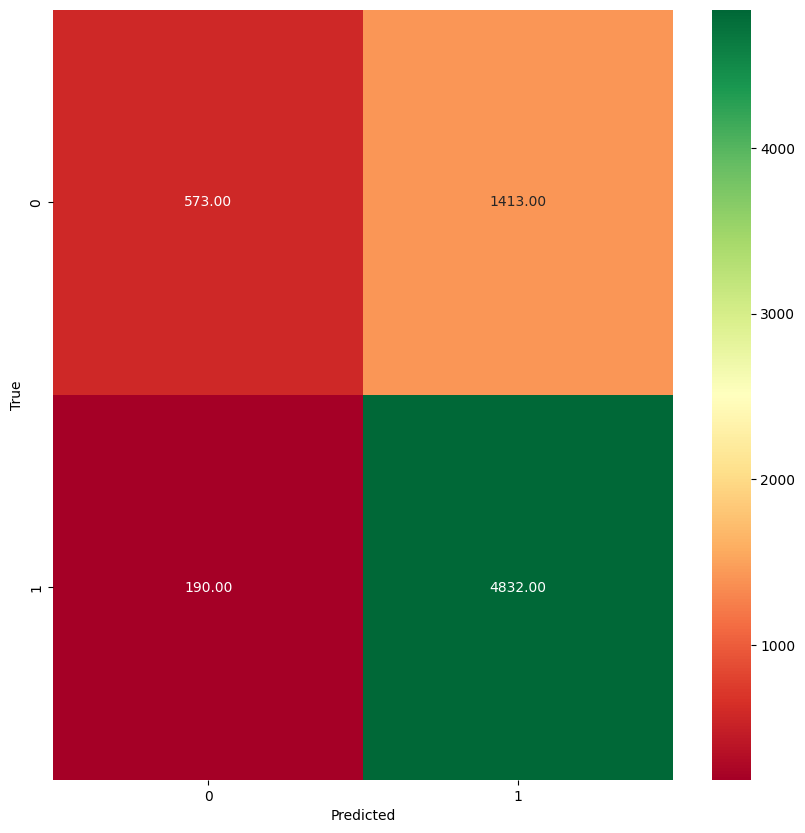

In [54]:
# Call the plot_cm function to generate the confusion matrix.

def plot_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
  plt.xlabel('Predicted')
  plt.ylabel('True')

plot_cm(y_test, y_pred)

In [55]:
# Calculate the precision, recall, and f1 score of the model. In a Markdown comment below the result, interpret the results.
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Precision: 0.7737389911929544
Recall: 0.9621664675428117
F1: 0.8577261027780244


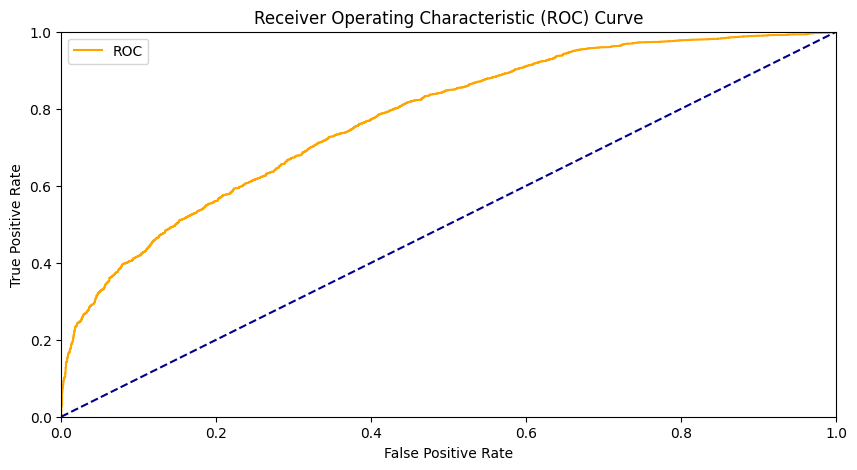

0.7724292067571367


In [56]:
# Generate the ROC Curve or a Precision-Recall curve as appropriate with (AUC). In a comment below your results, interpret your results and explain why your choice of curve.
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(10,5))
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

y_pred_proba = pipeline.predict_proba(X_test)
y_pred_proba

y_pred_proba = y_pred_proba[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

I believe using the ROC Curve is a good choice to use since the AUC is 0.77. This tells me the model is is a pretty good model to use since it's getting close to 1.0.

### 6. Conclusion

<!-- In a Markdown comment, write a conclusion on how suitable you think this model is for predicting week_status -->
I believe this model is kind of suitable to determining the status of the week.